In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
file_path = "/content/time_series_covid19.csv"
df = pd.read_csv(file_path)

In [4]:
date_columns = df.columns[11:]

In [5]:
time_series = df[date_columns].sum(axis=0)

In [6]:
time_series.index = pd.to_datetime(time_series.index)

<ipython-input-6-de83dd0d7fbd>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series.index = pd.to_datetime(time_series.index)


In [7]:
def plot_series(series, title="Time Series"):
    plt.figure(figsize=(12, 5))
    plt.plot(series, label="Total Cases")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Total Cases")
    plt.legend()
    plt.show()

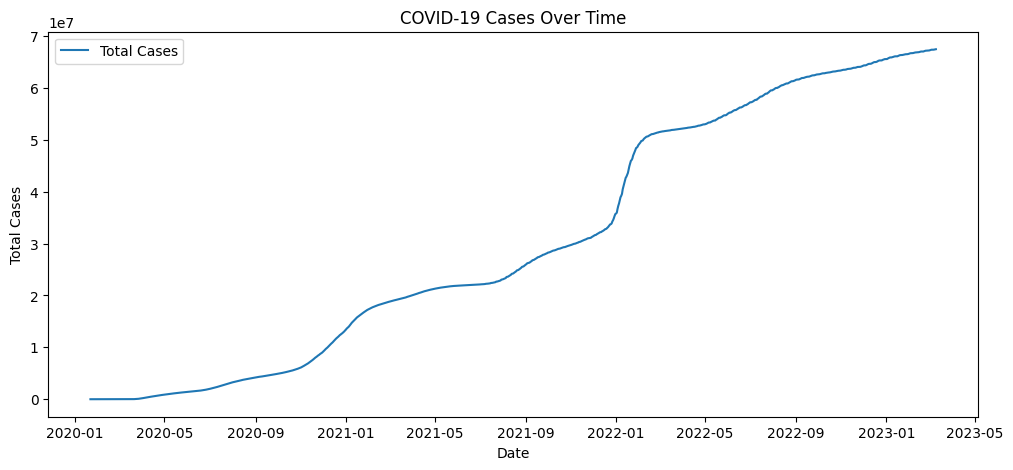

In [8]:
plot_series(time_series, title="COVID-19 Cases Over Time")

In [9]:
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("Series is stationary")
    else:
        print("Series is NOT stationary")

In [10]:
adf_test(time_series)

ADF Statistic: 0.040813759830725646
p-value: 0.9617799936639937
Series is NOT stationary


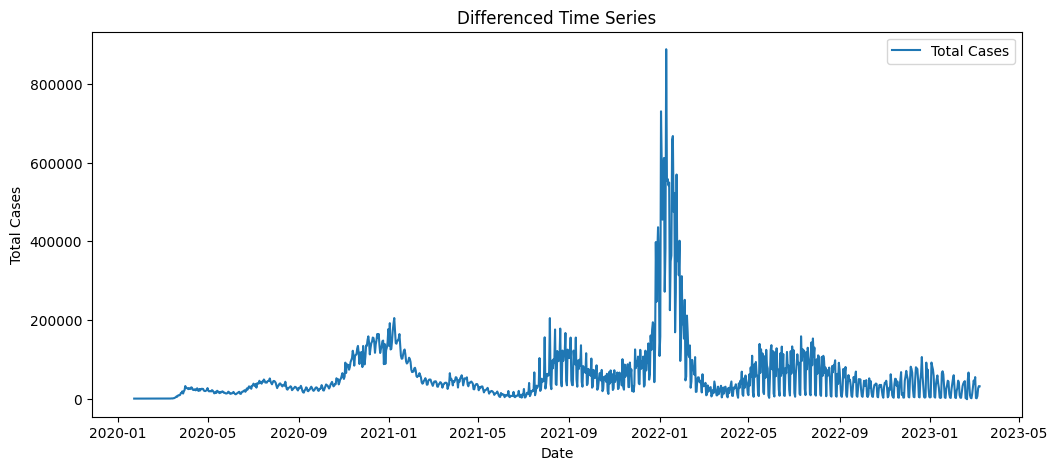

In [11]:
diff_series = time_series.diff().dropna()
plot_series(diff_series, title="Differenced Time Series")

In [12]:
adf_test(diff_series)

ADF Statistic: -4.6036445563405195
p-value: 0.00012718636213537092
Series is stationary


In [13]:
def plot_acf_pacf(series):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    plot_acf(series, ax=ax[0])   # Identifies MA (q) component
    plot_pacf(series, ax=ax[1])  # Identifies AR (p) component
    plt.show()

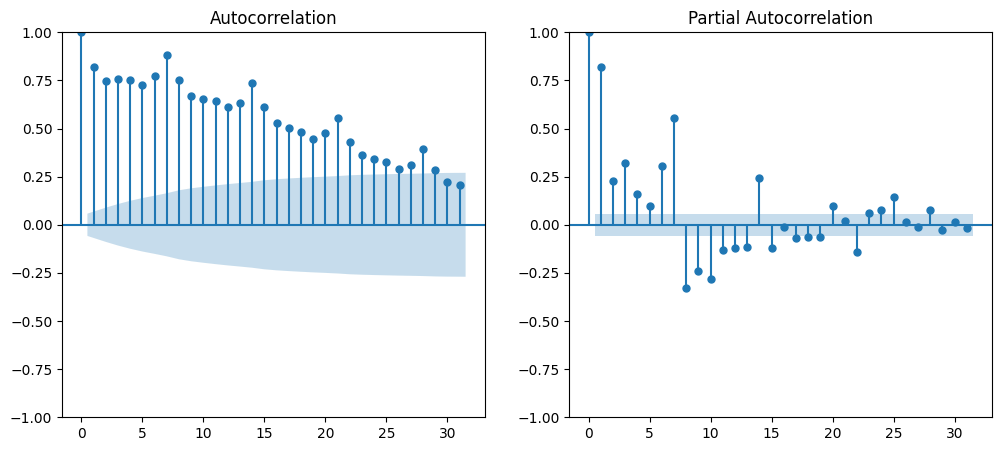

In [14]:
plot_acf_pacf(diff_series)

In [15]:
model = ARIMA(time_series, order=(2, 1, 2))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [16]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1143
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -13783.716
Date:                Sun, 20 Apr 2025   AIC                          27577.431
Time:                        08:57:44   BIC                          27602.634
Sample:                    01-22-2020   HQIC                         27586.948
                         - 03-09-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3516      0.028     12.462      0.000       0.296       0.407
ar.L2          0.6346      0.029     22.036      0.000       0.578       0.691
ma.L1          0.0966      0.020      4.744      0.0

In [22]:
forecast = model_fit.forecast(steps=30)

In [19]:
def plot_forecast(time_series, forecast):
    plt.figure(figsize=(12, 5))
    plt.plot(time_series, label="Actual Cases")
    plt.plot(pd.date_range(start=time_series.index[-1], periods=30, freq="D"), forecast, label="Forecast", color="red")
    plt.title("COVID-19 Cases Forecast")
    plt.xlabel("Date")
    plt.ylabel("Total Cases")
    plt.legend()
    plt.show()

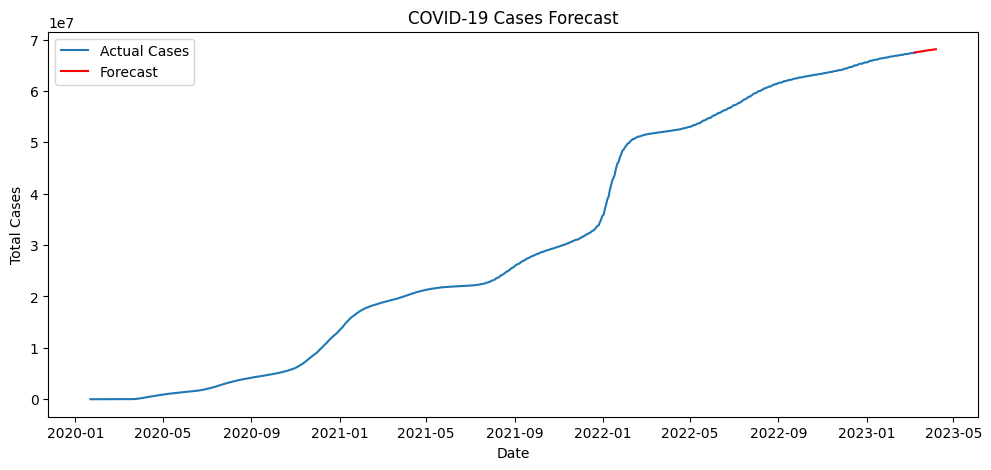

In [23]:
plot_forecast(time_series, forecast)